In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data Explority

In [2]:
df=pd.read_csv("/kaggle/input/test-file/tested.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Handling Missing Values


In [8]:

df=df.drop(columns="Cabin")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [9]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Age"].isna().sum()

/tmp/ipykernel_17/860347776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


0

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [11]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)
df["Fare"].isna().sum()

/tmp/ipykernel_17/2544534925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(),inplace=True)


0

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# #Data Analysis

In [13]:
Survived=df["Survived"].value_counts()
Survived


Survived
0    266
1    152
Name: count, dtype: int64

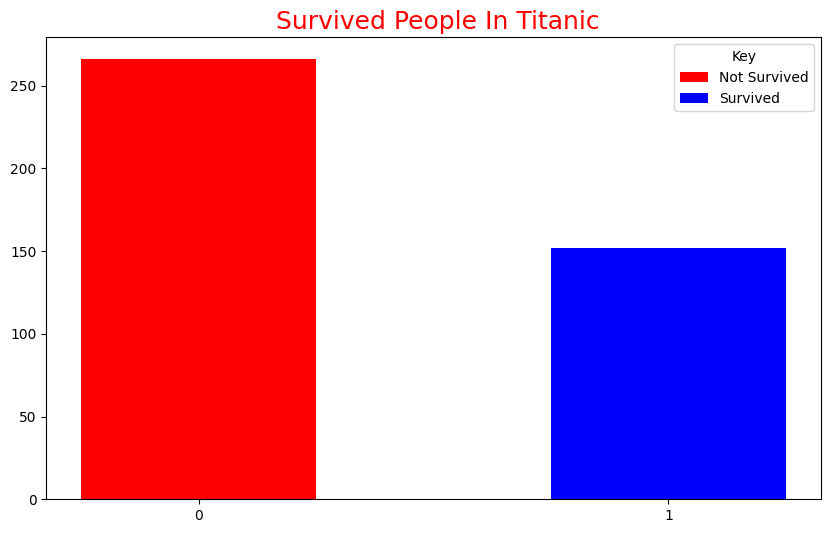

In [14]:
plt.figure(figsize=(10,6))
plt.title(" Survived People In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(Survived.index,Survived.values,width=0.5,color=["red","blue"],label=["Not Survived","Survived"])
plt.legend(loc="best",title="Key")
plt.xticks(np.arange(0,2,1))
plt.show()

In [15]:
Class=df["Pclass"].value_counts()
Class

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

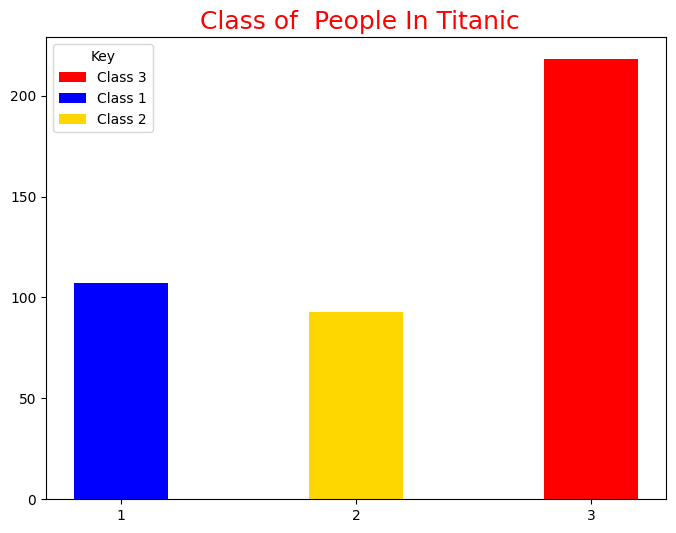

In [16]:
plt.figure(figsize=(8,6))
plt.title(" Class of  People In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(Class.index,Class.values,width=0.4,color=["red","blue","gold"],label=["Class 3","Class 1","Class 2"])
plt.legend(loc="best",title="Key")
plt.xticks(np.arange(1,4,1))
plt.show()

In [17]:
sex=df["Sex"].value_counts()
sex

Sex
male      266
female    152
Name: count, dtype: int64

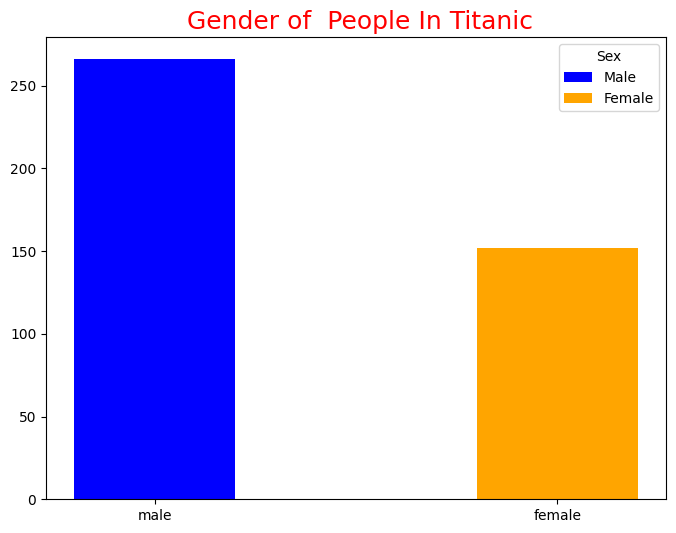

In [18]:
plt.figure(figsize=(8,6))
plt.title(" Gender of  People In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(sex.index,sex.values,width=0.4,color=["blue","orange"],label=["Male","Female"])
plt.legend(loc="best",title="Sex")
plt.xticks(np.arange(0,2,1))
plt.show()


In [19]:
df["Age"].describe()


count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

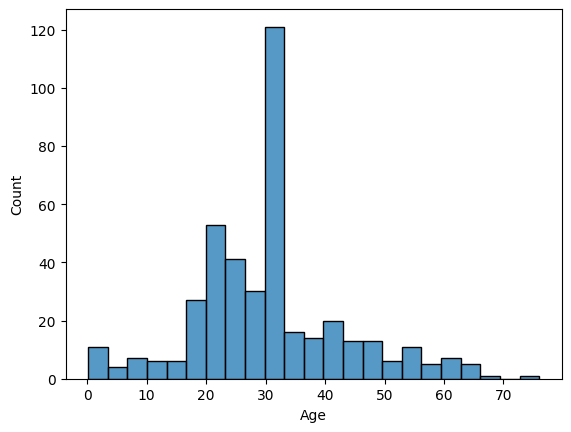

In [20]:
sns.histplot(df["Age"])

In [21]:
df["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SibSp', ylabel='Count'>

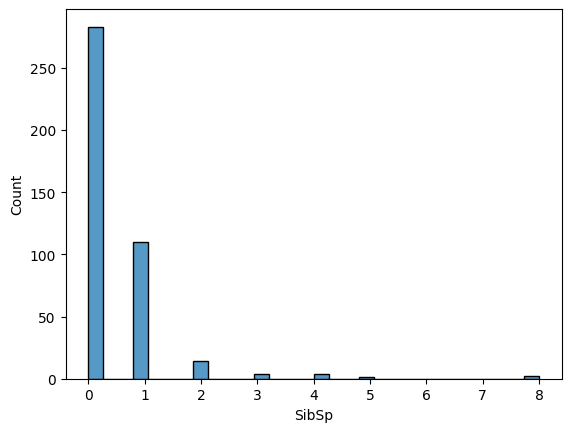

In [22]:
sns.histplot(df["SibSp"])

In [23]:
df["Parch"].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parch', ylabel='Count'>

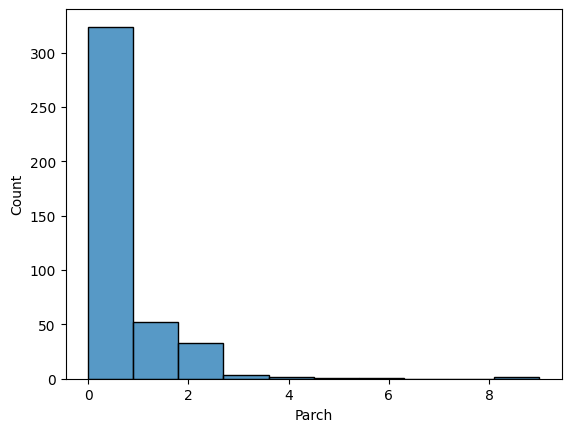

In [24]:
sns.histplot(df["Parch"])

In [25]:
df["Fare"].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Fare'>

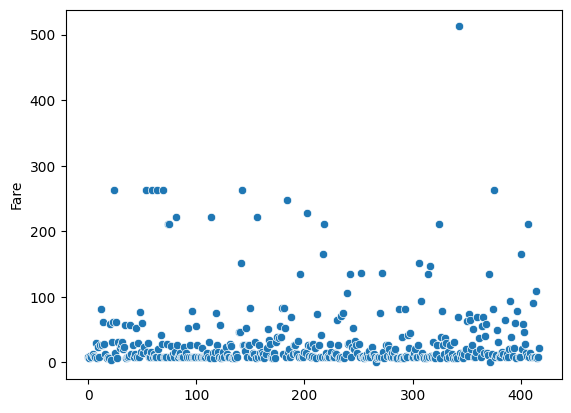

In [26]:
sns.scatterplot(df["Fare"])

In [27]:
Embark=df["Embarked"].value_counts()
Embark

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

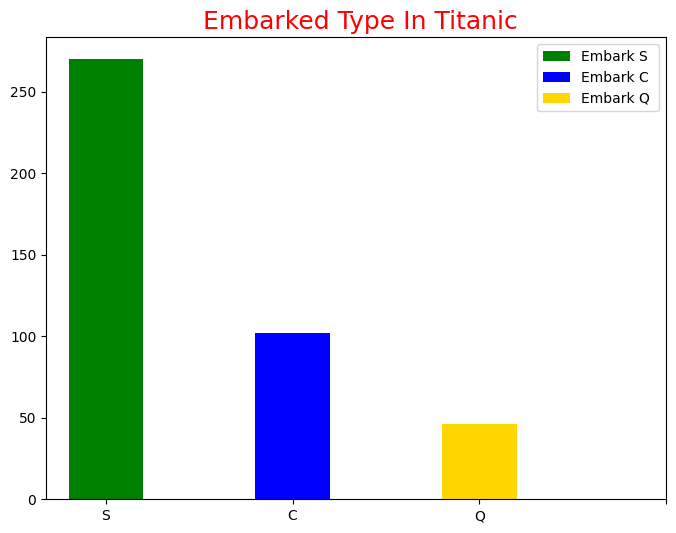

In [28]:
plt.figure(figsize=(8,6))
plt.title(" Embarked Type In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(Embark.index,Embark.values,width=0.4,color=["green","blue","gold"],label=["Embark S","Embark C ","Embark Q"])
plt.legend(loc="best")
plt.xticks(np.arange(0,4,1))
plt.show()

In [29]:
S_S=df.groupby("Survived")["Sex"].value_counts()
S_S


Survived  Sex   
0         male      266
1         female    152
Name: count, dtype: int64

In [30]:
S_A=df.groupby("Survived")["Age"].describe()
S_A


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,266.0,30.272699,11.747824,0.33,24.0,30.27259,34.375,67.0
1,152.0,30.272400,14.093657,0.17,22.0,30.00000,36.000,76.0


In [31]:
S_C=df.groupby(["Survived"])["Pclass"].value_counts()
S_C

Survived  Pclass
0         3         146
          2          63
          1          57
1         3          72
          1          50
          2          30
Name: count, dtype: int64

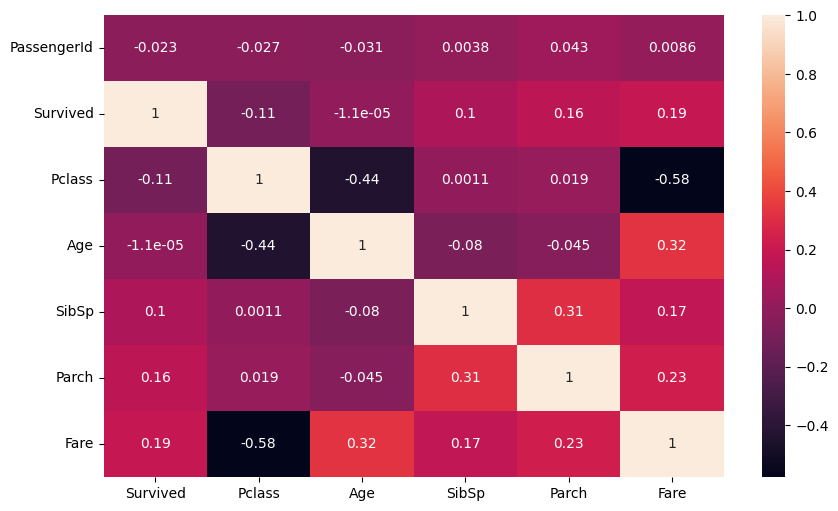

In [32]:
plt.figure(figsize=(10,6))
corr=df.corr(numeric_only=True)
corr=corr.drop(columns="PassengerId")
sns.heatmap(corr,annot=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

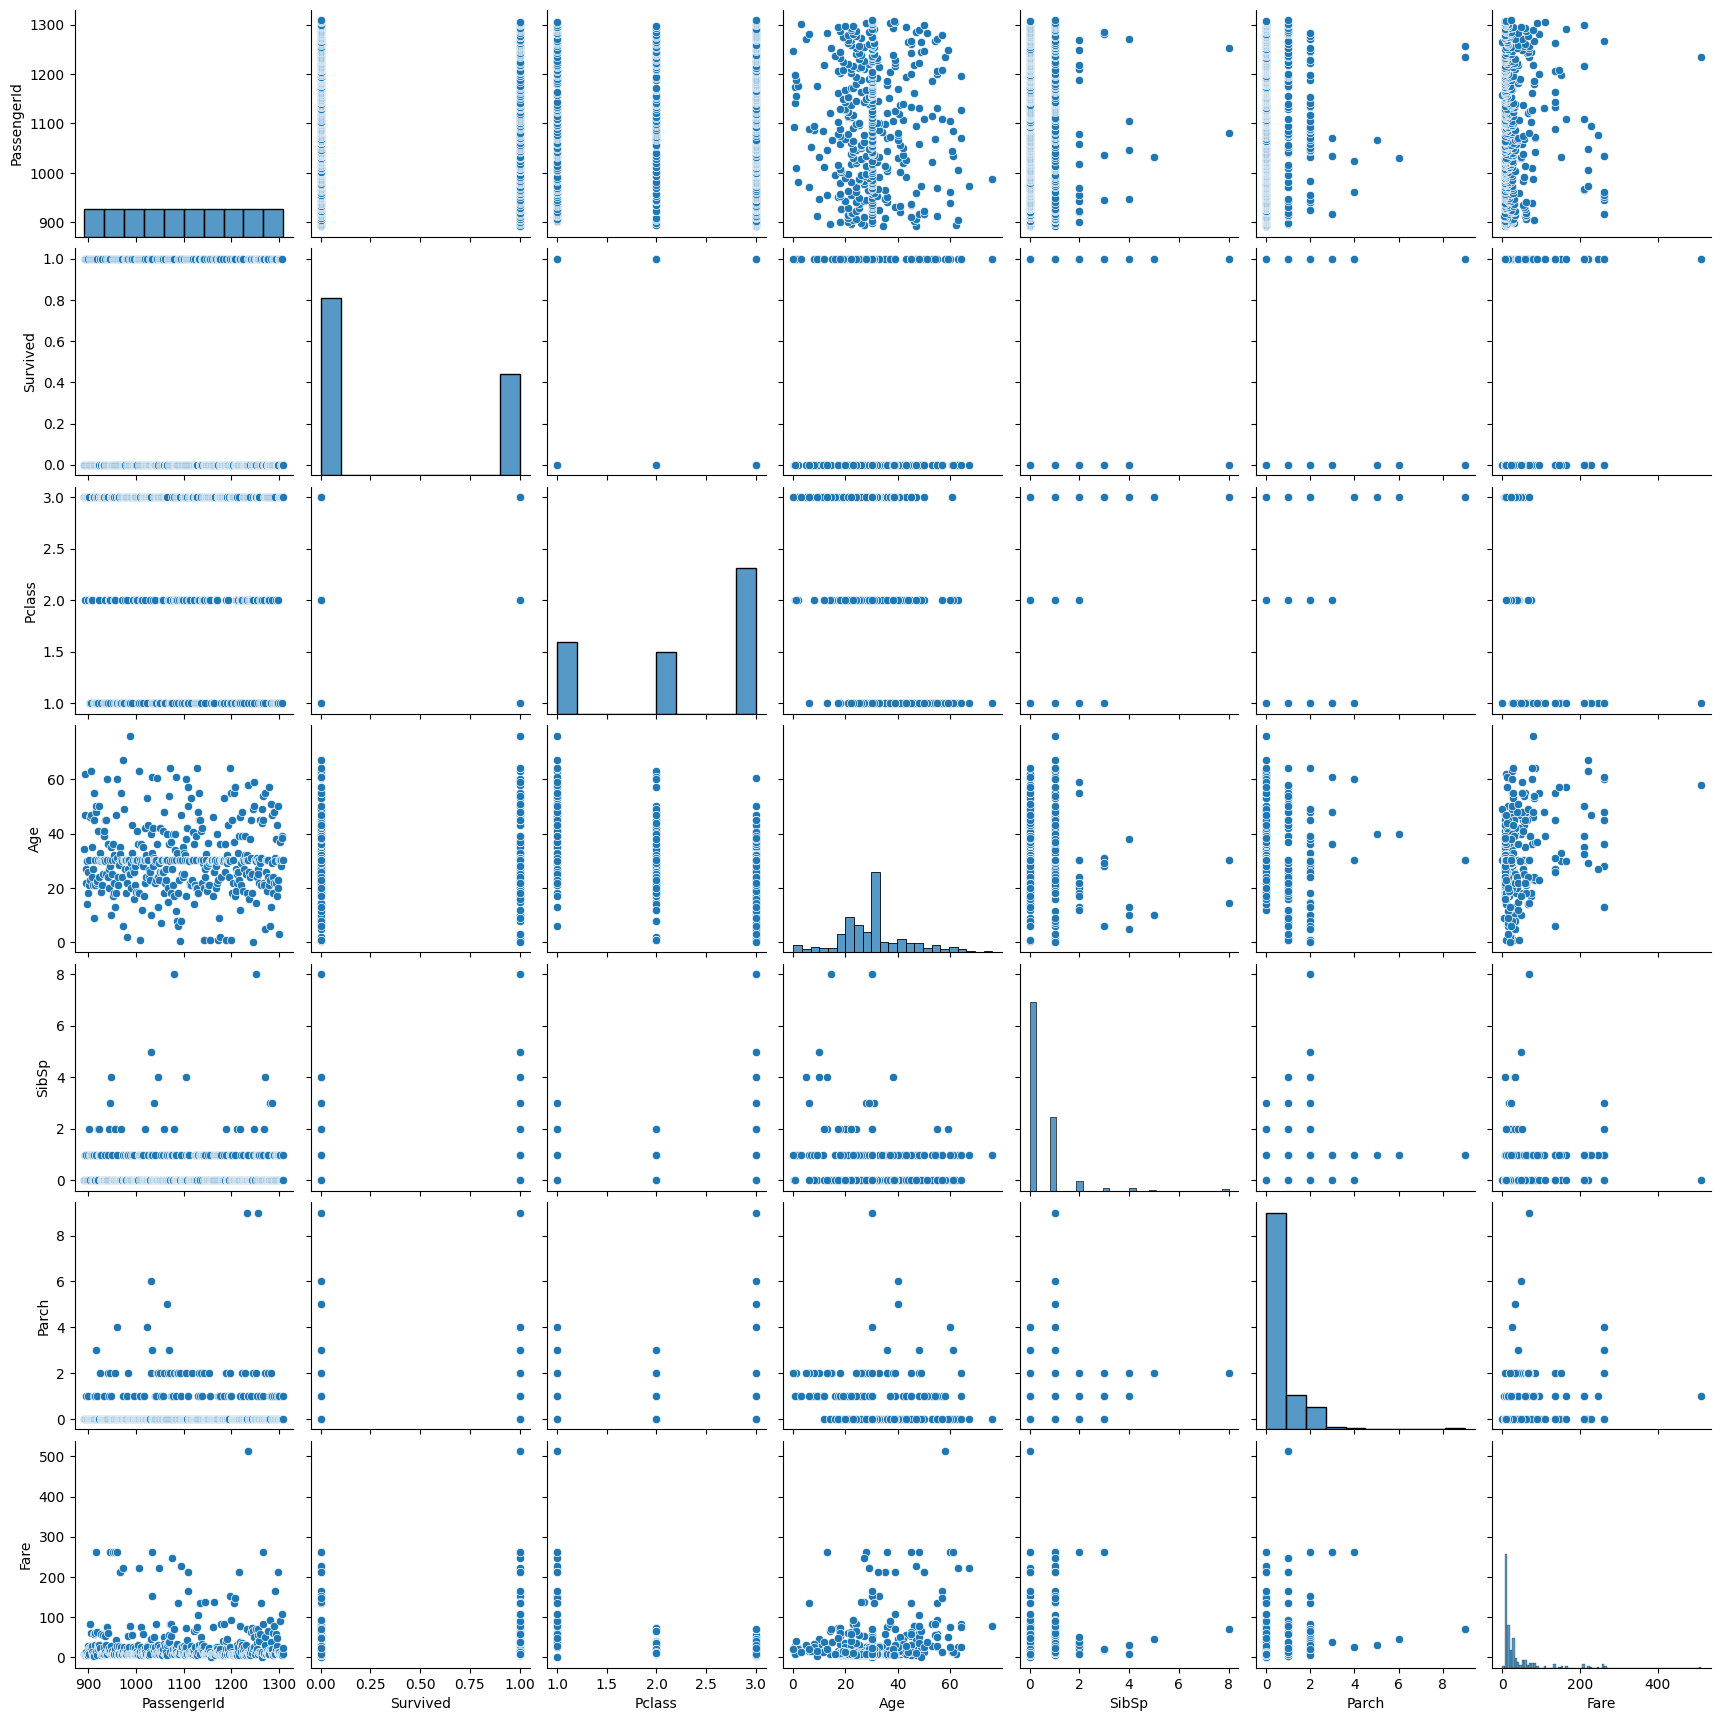

In [33]:
sns.pairplot(df)

In [34]:
df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)



In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


# Logistics Regression Model

In [36]:
df = pd.get_dummies(df, drop_first=True)


In [37]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
Scale=StandardScaler()
x_train=Scale.fit_transform(x_train)
x_test=Scale.fit_transform(x_test)


In [40]:
model=LogisticRegression()


In [41]:
model.fit(x_train,y_train)


LogisticRegression()

In [42]:
y_predict=model.predict(x_test)


# Evaluate the model


In [43]:
print("Accuracy ",accuracy_score(y_test,y_predict))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_predict))
print("Classification Report",classification_report(y_test,y_predict))

Accuracy  1.0
Confusion Matrix : 
 [[50  0]
 [ 0 34]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

